# Quantum Optics (and beyond)
## Fanaten Presentation November 2023 - Part 2


#### Part 1 of this presentation can be found at https://robhendrik.github.io/Fanaten2023/

#### Part 2 of this presentation can be found at https://robhendrik.github.io/superquantum/


![Alt text](Slide3.JPG)


![Alt text](Slide50.JPG)

![Alt text](Slide51.JPG)

![Alt text](Slide52b.jpg)

![Alt text](Slide53.JPG)

![Alt text](Slide54.JPG)

![Alt text](Slide55.JPG)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

import sys  
sys.path.append("../src") # path to directory for modules fock_state_circuit.py and collection_of_states.py
sys.path.append("../../../SW Projects/GitHubClones-NewPC/FockStateCircuit100/src") # remove before publishing
import fock_state_circuit as fsc

In [2]:
class NS_box:
    def __init__(self, K: int = 4):
        # first set all 4 outputs of the box to a random number 1 or 0
        random_number = np.random.randint(2, size=1)
        self._AS = np.random.randint(2, size=1)[0]
        self._AT = np.random.randint(2, size=1)[0]
        self._BS = np.random.randint(2, size=1)[0]
        self._BT = np.random.randint(2, size=1)[0]

        # determine whether this is a good box or a bad box, with
        # probability determined by the K-value
        self.probability_of_guessing_right = (1/2)*(1+ K/4)
        if np.random.randint(0,10000, size=1)[0] < self.probability_of_guessing_right * 10000:
            self._this_box_is_right = True
        else:
            self._this_box_is_right = False
   
    def Alice_S(self):
        if self._AS >= 0: # if Alice measures 'S'
            self._AT = -1 # disable measurement 'T'
            if self._BS >=0 and self._BT >= 0:
                if self._this_box_is_right: # depending on whether this box is 'good' or 'bad'
                    self._BS = self._AS # set the right outcome for Bob
                    self._BT = self._AS
                else:
                    self._BS = (self._AS+1)%2 # or set the wrong outcome for Bob
                    self._BT = (self._AS+1)%2
            return self._AS
        else:
            raise Exception('Alice can only perform one measurment on an NS box')
    def Alice_T(self):
        if self._AT >= 0:
            self._AS = -1
            if self._BS >=0 and self._BT >= 0:
                if self._this_box_is_right:
                    self._BS = self._AT
                    self._BT = (self._AT+1)%2
                else:
                    self._BS = (self._AT+1)%2
                    self._BT = self._AT
            return self._AT
        else:
            raise Exception('Alice can only perform one measurment on an NS box')
    def Bob_S(self):
        if self._BS >= 0:
            self._BT = -1
            if self._AS >=0 and self._AT >= 0:
                if self._this_box_is_right:
                    self._AS = self._BS
                    self._AT = self._BS
                else:
                    self._AS = (self._BS+1)%2
                    self._AT = (self._BS+1)%2
            return self._BS
        else:
            raise Exception('Bob can only perform one measurment on an NS box')
    def Bob_T(self):
        if self._BT >= 0:
            self._BS = -1
            if self._AS >=0 and self._AT >= 0:
                if self._this_box_is_right:
                    self._AS = self._BT
                    self._AT = (self._BT+1)%2
                else:
                    self._AS = (self._BT+1)%2
                    self._AT = self._BT
            return self._BT
        else:
            raise Exception('Bob can only perform one measurment on an NS box')
        
    def __str__(self):
        if self._AS < 0:
            first_letter = 'T'
            first_number = str(self._AT)
        elif self._AT < 0:
            first_letter = 'S'
            first_number = str(self._AS)
        else:
            first_letter = '?'
            first_number = '?'
        if self._BS < 0:
            second_letter = 'T'
            second_number = str(self._BT)
        elif self._BT < 0:
            second_letter = 'S'
            second_number = str(self._BS)
        else:
            second_letter = '?'
            second_number = '?'
        return first_letter + second_letter + '/' + first_number + second_number

In [3]:
print('NS-Boxes can be measured by Alice and by Bob')
box = NS_box()
print("SS ",box.Alice_S(),box.Bob_S())
box = NS_box()
print("ST ",box.Alice_S(),box.Bob_T())
box = NS_box()
print("TS ",box.Alice_T(),box.Bob_S())
box = NS_box()
print("TT ",box.Alice_T(),box.Bob_T())

print('\nNS-Boxes cannot be measured twice at the same "side"')
box = NS_box()
print("Alice measures T-gate ",box.Alice_T())
try:
    print("Alice measures S-gate on same box",box.Alice_S())
except:
    print("Error occured when Alice tried to measure S-gate after measuring T-gate")

print("\nBefore measurement boxes have an 'unknown' state")
box = NS_box()
print("Box before mearement", box)
Alice = box.Alice_T()
print("Box after measurement by Alice", box)
Bob = box.Bob_T()
print("Box after measurement by Bob", box)

NS-Boxes can be measured by Alice and by Bob
SS  0 0
ST  1 1
TS  0 0
TT  1 0

NS-Boxes cannot be measured twice at the same "side"
Alice measures T-gate  0
Error occured when Alice tried to measure S-gate after measuring T-gate

Before measurement boxes have an 'unknown' state
Box before mearement ??/??
Box after measurement by Alice T?/0?
Box after measurement by Bob TT/01


![Alt text](Slide56.JPG)

In [4]:
class Box_For_Bob():
    def __init__(self, box: NS_box):
        self.box = box

    @property
    def T(self):
        return self.box.Bob_T()
    
    @property
    def S(self):
        return self.box.Bob_S()
    
class Box_For_Alice():
    def __init__(self, box: NS_box):
        self.box = box

    @property
    def T(self):
        return self.box.Alice_T()
    
    @property
    def S(self):
        return self.box.Alice_S()

def order_boxes_at_Amazon(quantity: int = 1000, K_value: int = 4):
    boxes = [NS_box(K_value) for _ in range(quantity)]
    set_of_boxes_for_Bob = [Box_For_Bob(box) for box in boxes]
    set_of_boxes_for_Alice = [Box_For_Alice(box) for box in boxes]
    return (set_of_boxes_for_Alice,set_of_boxes_for_Bob)

def perform_random_measurement(set_of_boxes):
    outcomes = []
    measurements = []
    while len(set_of_boxes)>0:
        box = set_of_boxes.pop()
        measurement = random.choice(['T', 'S'])
        measurements.append(measurement)
        if measurement == 'T':
            outcomes.append(box.T)
        else:
            outcomes.append(box.S)
    return (measurements, outcomes)

def assess_CHSH_correlation(bobs_result, alices_result):
    bobs_measurements, bobs_outcomes = bobs_result
    alices_measurements, alices_outcomes = alices_result
    number_of_datapoints = len(bobs_measurements)
    counter = 0
    while len(bobs_measurements)> 0:
        if 'S' in (bobs_measurements.pop(), alices_measurements.pop()):
            counter += +1 if bobs_outcomes.pop() == alices_outcomes.pop() else -1
        else:
            counter += -1 if bobs_outcomes.pop() == alices_outcomes.pop() else +1
    return 4*counter/number_of_datapoints

In [5]:
set_of_boxes_for_Alice, set_of_boxes_for_Bob = order_boxes_at_Amazon(quantity=4000, K_value = 4)
measurements = ['TT', 'TS', 'ST', 'SS']
outcome = []
for measurement in measurements:
    counter = 0
    for _ in range(int(len(measurements)/4)):
        Bobs_box = set_of_boxes_for_Bob.pop()
        Alices_box = set_of_boxes_for_Alice.pop()
        if measurement == 'TT':
            counter += 1 if (Bobs_box.T == Alices_box.T) else -1
        elif measurement == 'ST':
            counter += 1 if (Bobs_box.S == Alices_box.T) else -1
        elif measurement == 'TS':
            counter += 1 if (Bobs_box.T == Alices_box.S) else -1
        else:
            counter += 1 if (Bobs_box.S == Alices_box.S) else -1
    outcome.append(counter/int(len(measurements)/4))

print("CSHS correlation is: ", -1*outcome[0] + outcome[1] + outcome[2] +outcome[3])

CSHS correlation is:  4.0


In [6]:
K = 4
for K in [2, 2.2, 2.4, 2.6, 2.8, 3.0, 3.5, 4.0]:
    set_of_boxes_for_Alice, set_of_boxes_for_Bob = order_boxes_at_Amazon(quantity=4000, K_value = K)
    bobs_result = perform_random_measurement(set_of_boxes_for_Bob)
    alices_result = perform_random_measurement(set_of_boxes_for_Alice)

    S = assess_CHSH_correlation(bobs_result, alices_result)

    print('With K set to', K, 'the CHSH correlation is: ', S)

With K set to 2 the CHSH correlation is:  2.024
With K set to 2.2 the CHSH correlation is:  2.164
With K set to 2.4 the CHSH correlation is:  2.492
With K set to 2.6 the CHSH correlation is:  2.594
With K set to 2.8 the CHSH correlation is:  2.854
With K set to 3.0 the CHSH correlation is:  2.968
With K set to 3.5 the CHSH correlation is:  3.49
With K set to 4.0 the CHSH correlation is:  4.0


![Alt text](Slide57b.JPG)

![Alt text](Slide58b.JPG)

![Alt text](Slide59.JPG)

In [7]:
def length_of_bitstring(number):
    length = int(np.ceil(np.log2(number+1)))
    n = int(2**int(np.ceil(np.log2(length))))
    return n

def number_of_NS_boxes_needed(number):
    n = length_of_bitstring(number)
    stages = int(np.log2(n))
    counter = 0
    for k in range(stages):
        counter += 2**k 
    return counter

def generate_single_bit_by_Alice(number, 
                                number_of_bits_in_number,
                                set_of_boxes_for_Alice):
    # make a list of '1's and '0's for the number
    bitvalues = [
        (number >> position)%2 for position in range(number_of_bits_in_number-1,-1,-1)
        ]
    # determine the communication_bit
    list_of_Alice_results = [bitvalues]
    while len(bitvalues) > 1:  
        list_of_Alice_results.append([])
        for pair_index in range(len(bitvalues)//2):
            box = set_of_boxes_for_Alice[0]
            if bitvalues[pair_index*2] == bitvalues[pair_index*2 + 1]:
                result = 0 if box.S == bitvalues[pair_index*2] else 1
            else:
                result = 0 if box.T == bitvalues[pair_index*2] else 1
            list_of_Alice_results[-1].append(result)
            set_of_boxes_for_Alice = set_of_boxes_for_Alice[1:]
        bitvalues = list_of_Alice_results[-1]
    communication_bit = list_of_Alice_results[-1][0]
    return communication_bit

def generate_guess_by_Bob(bit_index, 
                        number_of_bits_in_number, 
                        communication_bit_Alice, 
                        set_of_boxes_for_Bob):
    result_per_stage = []
    bit_index_per_stage = bit_index
    boxes_in_previous_line = 0
    stages = int(np.log2(number_of_bits_in_number))
    for k in range(stages):
        pair, position = divmod(bit_index_per_stage,2)
        index = boxes_in_previous_line + pair
        boxes_in_previous_line += number_of_bits_in_number//(2**(k+1))
        box = set_of_boxes_for_Bob[index]
        if position == 0:
            result = box.S
        else:
            result = box.T
        result_per_stage.append(result)
        bit_index_per_stage = pair
    return str((communication_bit_Alice+sum(result_per_stage))%2)

![Alt text](Slide60b.JPG)

In [8]:
K = 4
max_number = 1000
L = length_of_bitstring(max_number)
N = number_of_NS_boxes_needed(max_number)

success_counter = 0
for _ in range(1000):   
    # step 1, generate the NS boxes before the number is known
    set_of_boxes_for_Alice, set_of_boxes_for_Bob = order_boxes_at_Amazon(quantity=N, 
                                                                        K_value = K)
    # generate random number and give to Alice
    number = np.random.randint(1,max_number)
    m = generate_single_bit_by_Alice(number=number , 
                                    number_of_bits_in_number = L, 
                                    set_of_boxes_for_Alice=set_of_boxes_for_Alice)
    # randomly select which bit Bob has to guess
    bit_index = np.random.randint(L)
    guess = generate_guess_by_Bob(bit_index=bit_index, 
                                number_of_bits_in_number = L, 
                                communication_bit_Alice=m, 
                                set_of_boxes_for_Bob=set_of_boxes_for_Bob)
    # check if guess if correct
    if guess == format(number, '0'+ str(L) + 'b')[bit_index]:
        success_counter += 1

# print the success rate for 1000 tries
print(success_counter)

1000


In [9]:
def get_success_probabilities(K, max_number, trials):
    L = length_of_bitstring(max_number)
    N = number_of_NS_boxes_needed(max_number)

    success_counter = 0
    for _ in range(trials):   
        # step 1, generate the NS boxes before the number is known
        set_of_boxes_for_Alice, set_of_boxes_for_Bob = order_boxes_at_Amazon(quantity=N, 
                                                                            K_value = K)
        # generate random number and give to Alice
        number = np.random.randint(1,max_number)
        m = generate_single_bit_by_Alice(number=number , 
                                        number_of_bits_in_number = L, 
                                        set_of_boxes_for_Alice=set_of_boxes_for_Alice)
        # randomly select which bit Bob has to guess
        bit_index = np.random.randint(L)
        guess = generate_guess_by_Bob(bit_index=bit_index, 
                                    number_of_bits_in_number = L, 
                                    communication_bit_Alice=m, 
                                    set_of_boxes_for_Bob=set_of_boxes_for_Bob)
        # check if guess if correct
        if guess == format(number, '0'+ str(L) + 'b')[bit_index]:
            success_counter += 1
    return success_counter

In [10]:
Ks = [4]
numbers = [8,128, 1024, 1024*1024]
trials = 1000
for K in Ks:
    for max_number in numbers:
        success = get_success_probabilities(K, max_number, trials)
        L = length_of_bitstring(max_number)
        print('For K =', K, ' and length of bit string = ', L,' the success rate is: ', success)

For K = 4  and length of bit string =  4  the success rate is:  1000
For K = 4  and length of bit string =  8  the success rate is:  1000
For K = 4  and length of bit string =  16  the success rate is:  1000
For K = 4  and length of bit string =  32  the success rate is:  1000


![Alt text](Slide61.JPG)

In [11]:
Ks = [i/10 for i in range(20,42,2)]
n_bit = [2**n for n in range(2,6)]
trials = 10000
res_e = []
for n in n_bit:
    res_en = []
    for K in Ks:
        L = length_of_bitstring(2**(n-1))
        success_experiment = get_success_probabilities(K, 2**(n-1), trials)
        res_en.append(success_experiment)
    res_e.append(res_en)


In [12]:
Ks = [i/10 for i in range(20,42,2)]
n_bit = [2**n for n in range(2,6)]
res_c = []
for n in n_bit:
    res_cn = []
    for K in Ks:
        L = length_of_bitstring(2**(n-1))
        success_calculated = (1/2)*(1+(K/4)**np.log2(n))
        res_cn.append(success_calculated)
    res_c.append(res_cn)

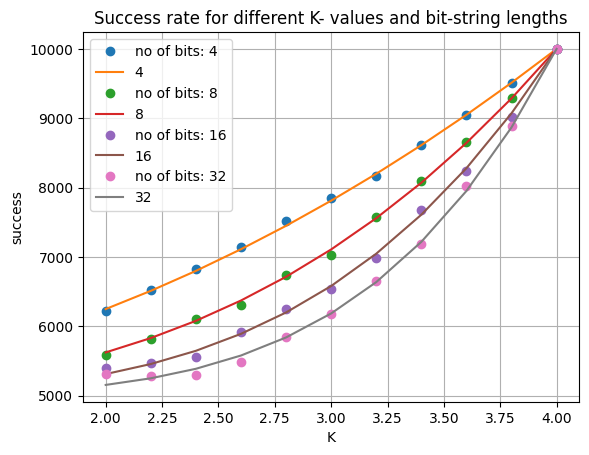

In [13]:
fig, ax = plt.subplots()
for n in range(len(n_bit)):
    ax.plot(Ks, res_e[n], label = 'no of bits: ' + str(n_bit[n]), linestyle = 'none', marker = 'o')
    ax.plot(Ks, [y*trials for y in res_c[n]], label = str(n_bit[n]), linestyle = 'solid', marker = 'none')

ax.set(xlabel='K', ylabel='success',
       title='Success rate for different K- values and bit-string lengths')
ax.grid()
plt.legend()
plt.show()

![Alt text](Slide62.JPG)

![Alt text](Slide63.JPG)

![Alt text](Slide64b-1.JPG)

In [14]:
def binary_entropy(p):
    return (-p*np.log2(p) - (1-p)*np.log2(1-p) )

def H_limit(n_bit):
    return 1 - 1/(n_bit)
def P(n_bit,K):
    n_bit = np.longdouble(n_bit)
    n = np.log2(n_bit)
    return (1/2) * (1+(float(K)/4.0)**float(n))
def H(P):
    P = float(P)
    return -P * np.log2(P) - (1-P)*np.log2(1-P)
def find_K(n_bit):
    n_bit = np.longdouble(n_bit)
    K_min = 1.0
    K_max = 4.0
    H_target = H_limit(n_bit)
    while ((K_max - K_min)/((K_max + K_min))) > 0.001:
        K_try = 1/2*(K_min + K_max)
        P_try = P(n_bit,K_try)
        H_try = H(P_try)
        if H_try > H_target:
            K_min = K_try
        elif H_try < H_target:
            K_max = K_try
        else:
            return K_try
    return K_try

In [15]:
BinEn_c = [[binary_entropy(s) for s in res_cn[:-1]] + [0] for res_cn in res_c]
BinEn_e = [[binary_entropy(s/trials) for s in res_en[:-1]]+ [0] for res_en in res_e]

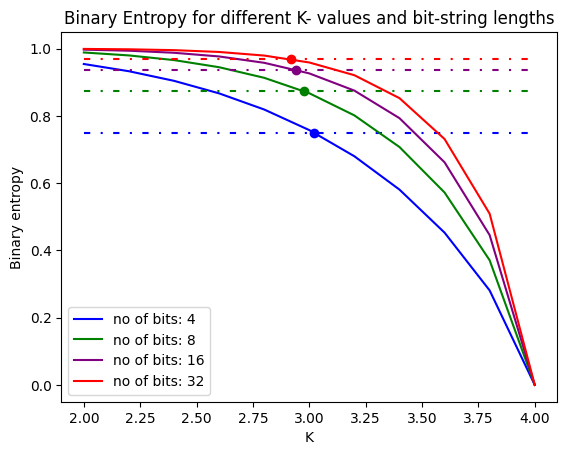

In [16]:
ns = [np.longdouble(2**n) for n in range(2,6)]
K_cross = [find_K(n) for n in ns]
H_cross = [H_limit(n) for n in ns]

fig, ax = plt.subplots()
colors = ['blue', 'green', 'purple', 'red']
for n in range(len(n_bit)):
    ax.plot(K_cross[n], H_cross[n],  linestyle = 'none', marker = 'o', color = colors[n])
    ax.plot(Ks, BinEn_c[n], label = 'no of bits: ' + str(n_bit[n]), linestyle = 'solid', marker = 'none', color = colors[n])
    ax.plot([2,4], [(1-1/n_bit[n]), (1-1/n_bit[n])], linestyle = (0, (3, 5, 1, 5)),color = colors[n] )
#ax.plot([2*np.sqrt(2),2*np.sqrt(2)], [1,0], linestyle = (0,(1,10)), color = 'black')
ax.set(xlabel='K', ylabel='Binary entropy',
       title='Binary Entropy for different K- values and bit-string lengths')
plt.legend()
plt.show()

![Alt text](Slide65.JPG)

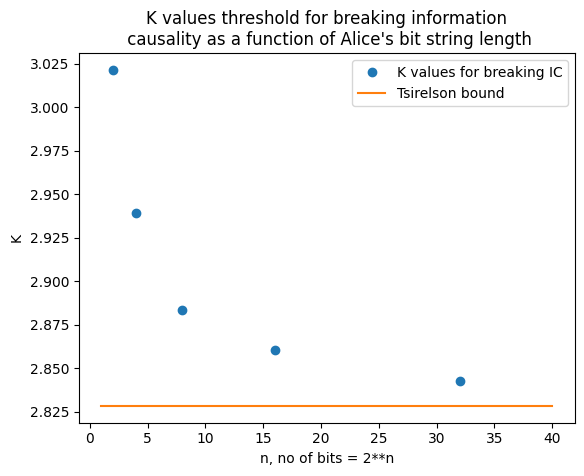

In [17]:
ns = []
Ks = []
for i in range(1,6):
    n = 2**i
    L = 2**n
    K = find_K(L)
    ns.append(n)
    Ks.append(K)
fig, ax = plt.subplots()
ax.plot(ns,Ks, label = 'K values for breaking IC', linestyle = 'none', marker = 'o')
ax.plot([1,40],[2*np.sqrt(2), 2*np.sqrt(2)], label = 'Tsirelson bound')
ax.set(xlabel='n, no of bits = 2**n', ylabel='K',
       title="K values threshold for breaking information\n causality as a function of Alice\'s bit string length")
plt.legend()
plt.show()

![Alt text](Slide66.JPG)

![Alt text](Slide67.JPG)

![Alt text](SuperentanglementSlide1.JPG)

![Alt text](SuperentanglementSlide2.JPG)

![Alt text](SuperentanglementSlide3.JPG)

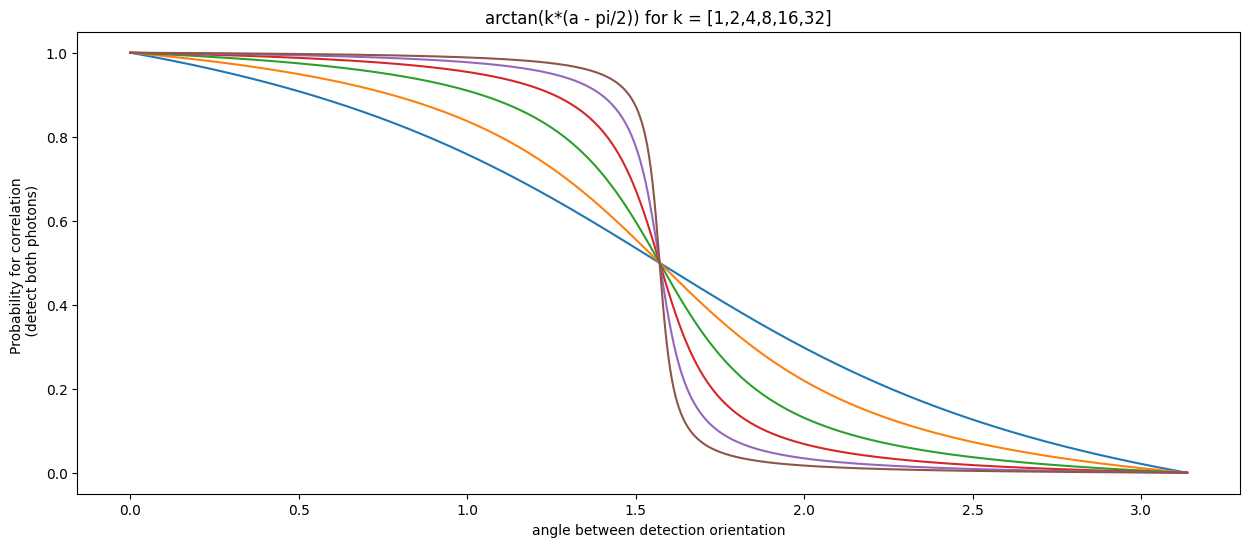

In [18]:
N = 600
plt.rcParams['figure.figsize'] = [15,6]
fig, ax = plt.subplots()
for F in [1,2,4,8,16,32]:
    angles = [(a)*(np.pi/N) for a in range(N)]
    baseline_arctan = [(np.arctan(F*(angle - (1/2)*np.pi))) for angle in angles]
    baseline_arctan = (baseline_arctan - min(baseline_arctan))/(max(baseline_arctan) - min(baseline_arctan))
    baseline_arctan = 1-baseline_arctan
    ax.plot(angles,baseline_arctan)
ax.set_title('arctan(k*(a - pi/2)) for k = [1,2,4,8,16,32]')
ax.set_xlabel('angle between detection orientation')
ax.set_ylabel('Probability for correlation \n (detect both photons)')
plt.show()

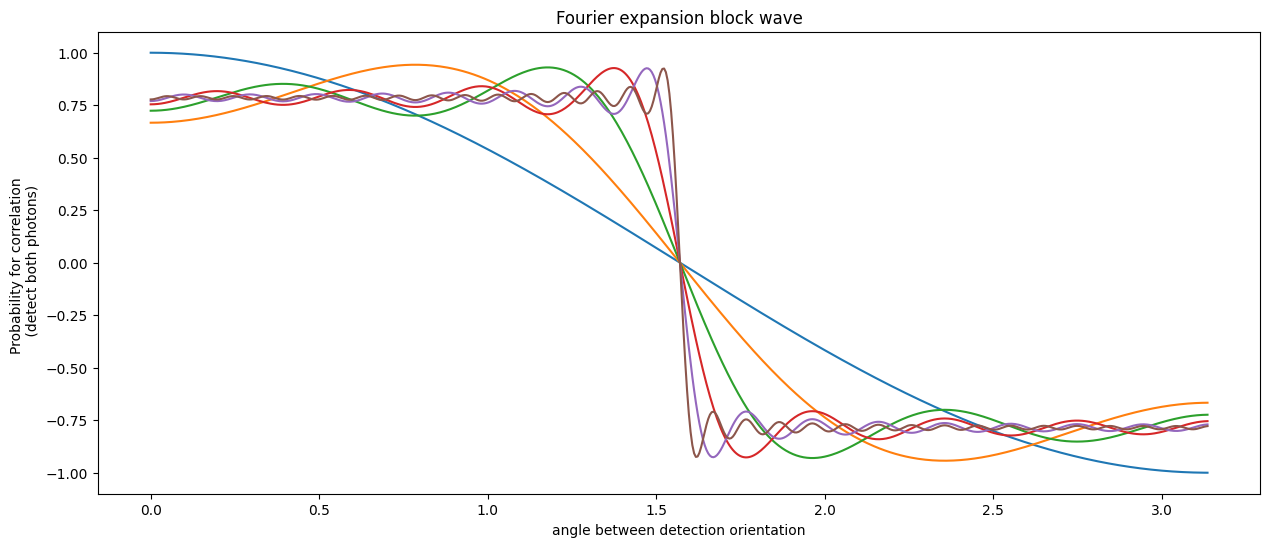

In [19]:
N = 600
plt.rcParams['figure.figsize'] = [15,6]
fig, ax = plt.subplots()
for F in [1,2,4,8,16,32]:
    angles = [(a)*(np.pi/N) for a in range(N)]
    baseline_fourier = [0 for angle in angles]
    for n in range(1,2*F,2):
        baseline_fourier = np.add(baseline_fourier,[(1/n)*np.sin(n*(angle+np.pi/2)) for angle in angles])
    #baseline_cos = (baseline_cos - min(baseline_cos))/(max(baseline_cos) - min(baseline_cos))
    #baseline_cos = 1-baseline_cos
    #ax.plot(angles,[(1/n)*np.sin(n*(angle+np.pi/2)) for angle in angles])
    ax.plot(angles,baseline_fourier)
ax.set_title('Fourier expansion block wave')
ax.set_xlabel('angle between detection orientation')
ax.set_ylabel('Probability for correlation \n (detect both photons)')
plt.show()

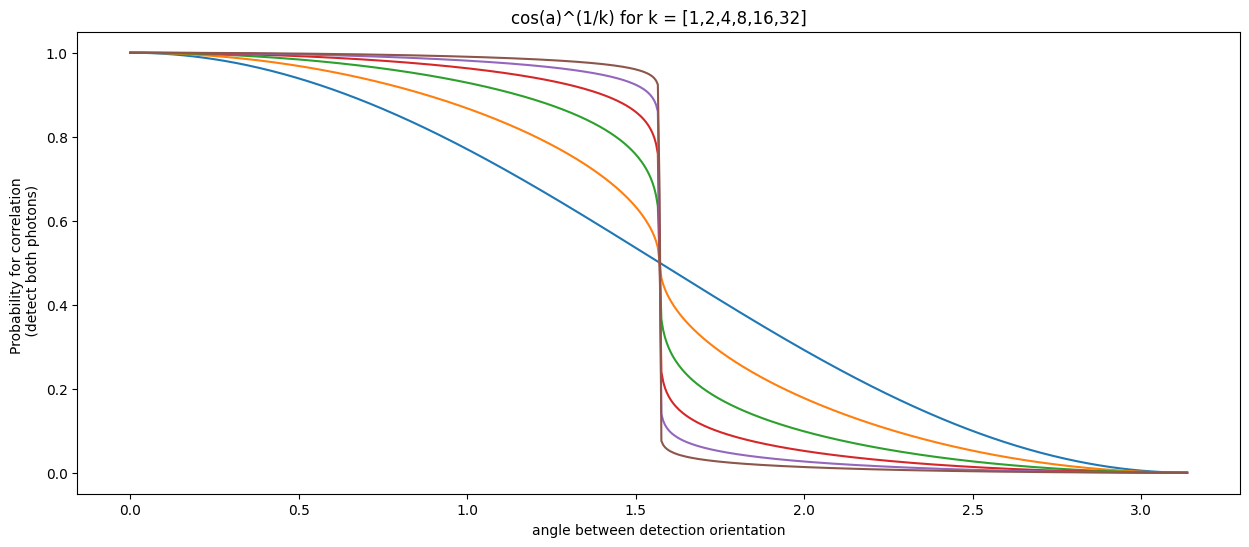

In [20]:
def correlation_vs_angle(angle, F):
    probability_amplitude = np.cos(angle)
    if probability_amplitude == 0:
        probability_amplitude = 0
    elif probability_amplitude > 0:
        probability_amplitude = np.power(probability_amplitude,1/F)
    else:
        probability_amplitude = -1*np.power(-1*probability_amplitude,1/F)
    
    Psame = (1/2)*(probability_amplitude + 1)
    Pdiff = 1-Psame

    return (probability_amplitude, Psame, Pdiff)

N = 600
plt.rcParams['figure.figsize'] = [15,6]
fig, ax = plt.subplots()
for F in [1,2,4,8,16,32]:
    angles = [(a)*(np.pi/N) for a in range(N)]
    baseline_cos = [correlation_vs_angle(angle, F)[1] for angle in angles]
    ax.plot(angles,baseline_cos)
ax.set_title('cos(a)^(1/k) for k = [1,2,4,8,16,32]')
ax.set_xlabel('angle between detection orientation')
ax.set_ylabel('Probability for correlation \n (detect both photons)')
plt.show()

![Alt text](SuperentanglementSlide4.JPG)

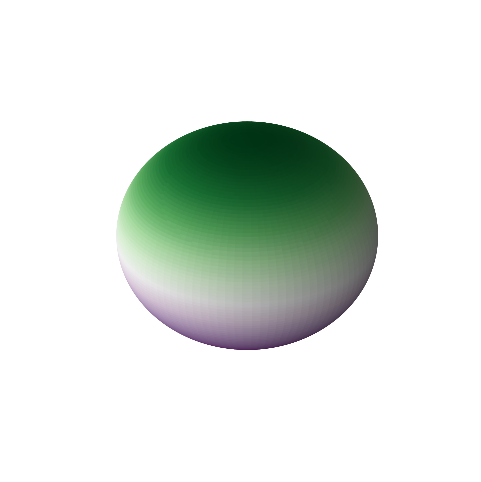

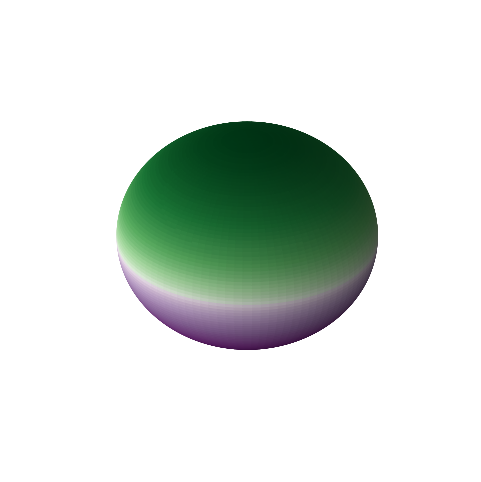

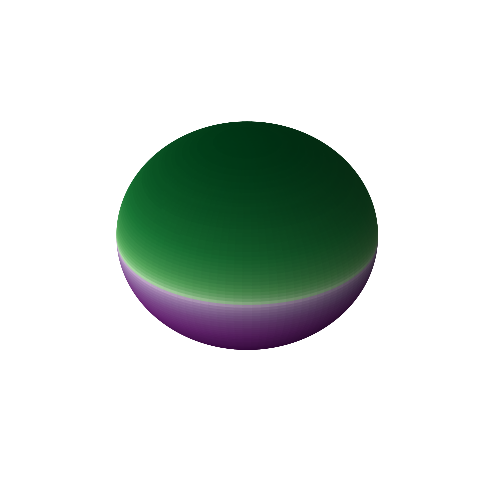

In [21]:
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

vectors2 = [[[np.sin(angle),0,np.cos(angle)] for angle in line] for line in phi]

for k in [1,2,4]:
    probability =  [[fsc.probability_from_stokes_vectors([0,0,1], vector2,k) for vector2 in line] for line in vectors2]
    fcolors = probability
    fig = plt.figure(figsize=plt.figaspect(1.))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.PRGn(fcolors))
    ax.set_axis_off()
    plt.show()

![Alt text](SuperentanglementSlide5.JPG)

![Alt text](SuperentanglementSlide6.JPG)

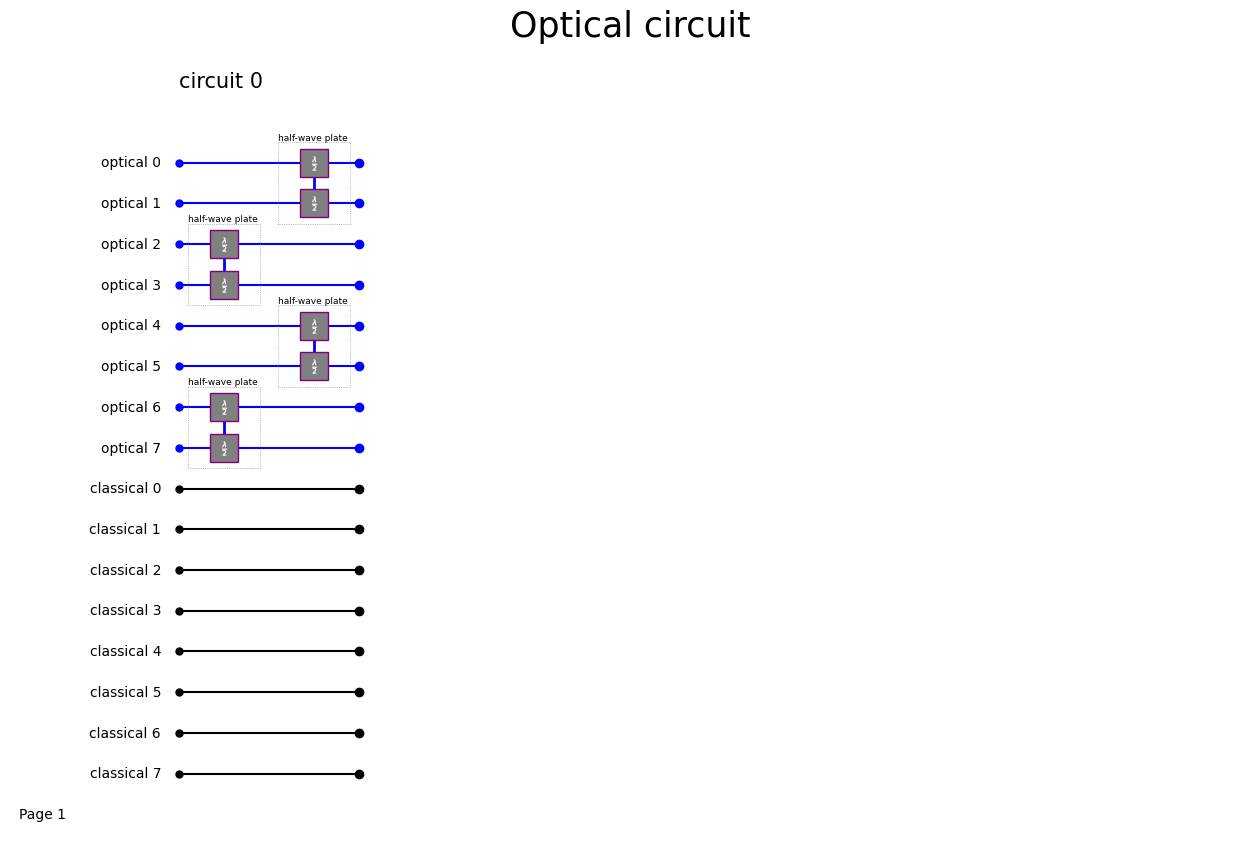

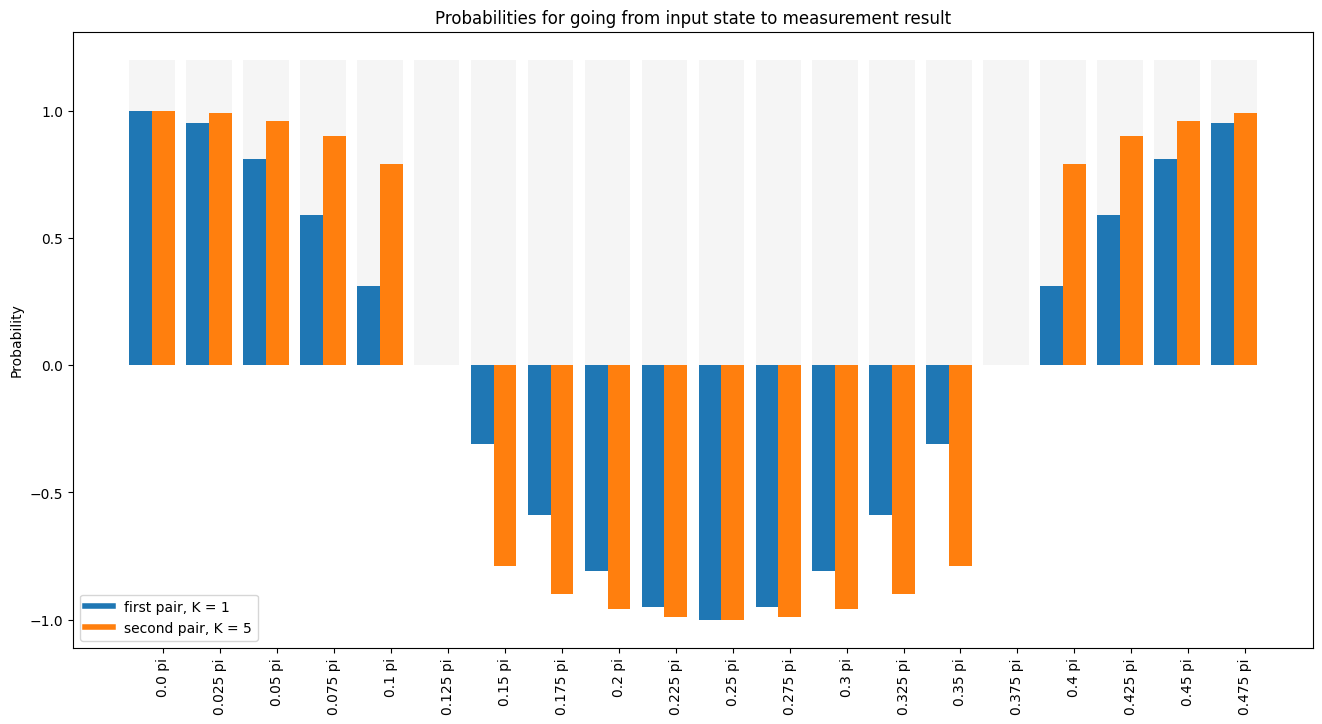

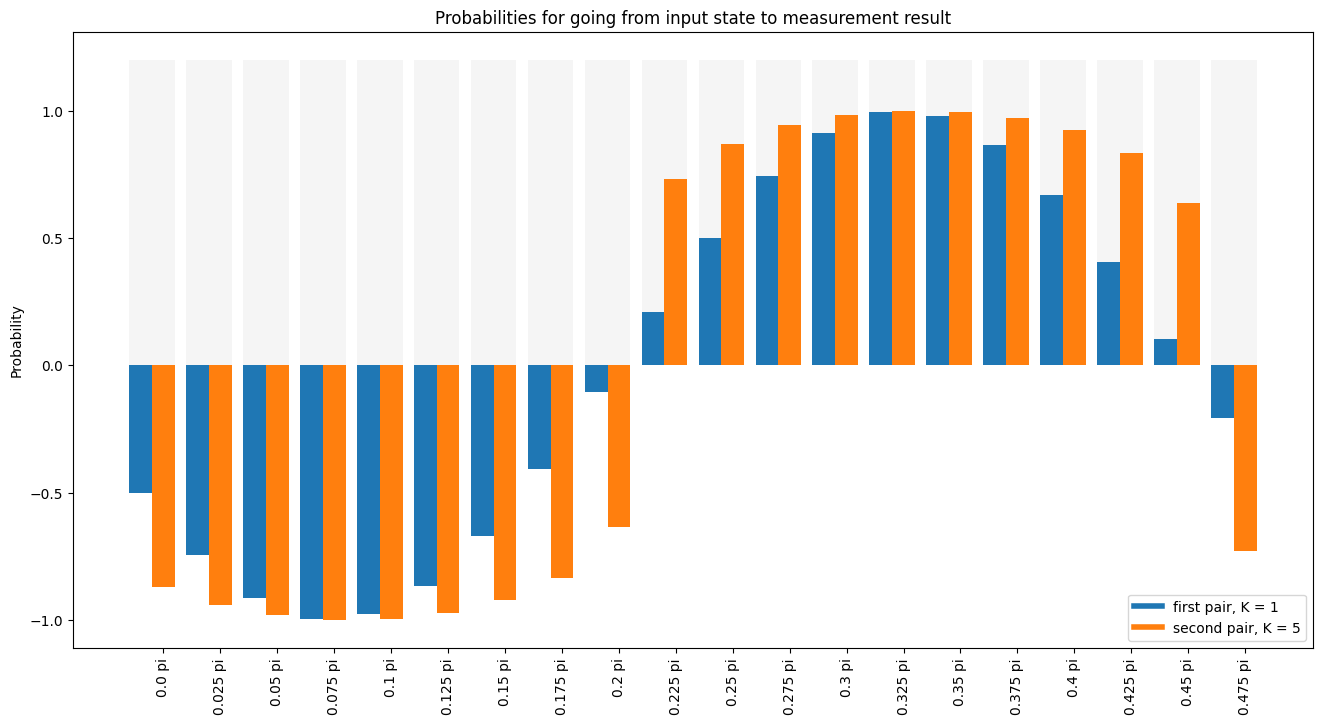

In [22]:
# This cell is modified in april 2024. The changes follow from incorporating the module 'no_signalling_boxes.py' into the fock state circuit package
# rather that using 'import no_signalling_boxes as nosb' and 'nosb.measure_collection_with_NS_boxes' we can now use 'fsc..measure_collection_with_NS_boxes'
# The 'import' statememt is included in __init__.py for fock state circuit.

N = 20
circuit_is_already_drawn = False
for angle_first in [0,np.pi/3]:
    dict_for_plotting = dict([])
    for angle in [(a/N)*np.pi/2 for a in range(N)]:
        circuit = fsc.FockStateCircuit(length_of_fock_state=3,no_of_optical_channels=8,no_of_classical_channels=8)
        circuit.half_wave_plate(channel_horizontal=2,channel_vertical=3,angle=angle)
        circuit.half_wave_plate(channel_horizontal=6,channel_vertical=7,angle=angle)
        circuit.half_wave_plate(channel_horizontal=0,channel_vertical=1,angle=angle_first)
        circuit.half_wave_plate(channel_horizontal=4,channel_vertical=5,angle=angle_first)

        if not circuit_is_already_drawn:
            circuit.draw()
            circuit_is_already_drawn = True
        collection = fsc.CollectionOfStates(fock_state_circuit=circuit,input_collection_as_a_dict=dict([]))
        state = fsc.State(collection_of_states=collection)
        ns_boxes = [{'channels_Ah_Av_Bh_Bv':[0,1,2,3],'quantumness_indicator':1},
                    {'channels_Ah_Av_Bh_Bv':[4,5,6,7],'quantumness_indicator':5}]
        collection_with_boxes = fsc.create_collection_with_NS_boxes(state, ns_boxes)
    
        output_collection = circuit.evaluate_circuit(collection_of_states_input=collection_with_boxes)
        histogram = fsc.measure_collection_with_NS_boxes(output_collection)
   
        channel_combis_for_correlation = [(0,2),(4,6)]
        label_for_channel_combinations = ['first pair, K = 1','second pair, K = 5']
        
        correlations = fsc.correlations_from_measured_collection_with_NS_boxes(histogram, channel_combis_for_correlation, state)
        
        lst = []
        lst.append({'output_state': 'first pair, K = 1', 'probability': correlations[0]})
        lst.append({'output_state': 'second pair, K = 5', 'probability': correlations[1]})
        dict_for_plotting.update({str(np.round(angle/np.pi,3)) + ' pi': lst})
    # corrected cos.plot_correlation to fsc.plot_correlation
    fsc.plot_correlations_for_NS_boxes(dict_for_plotting)

![Alt text](SuperentanglementSlide7.JPG)

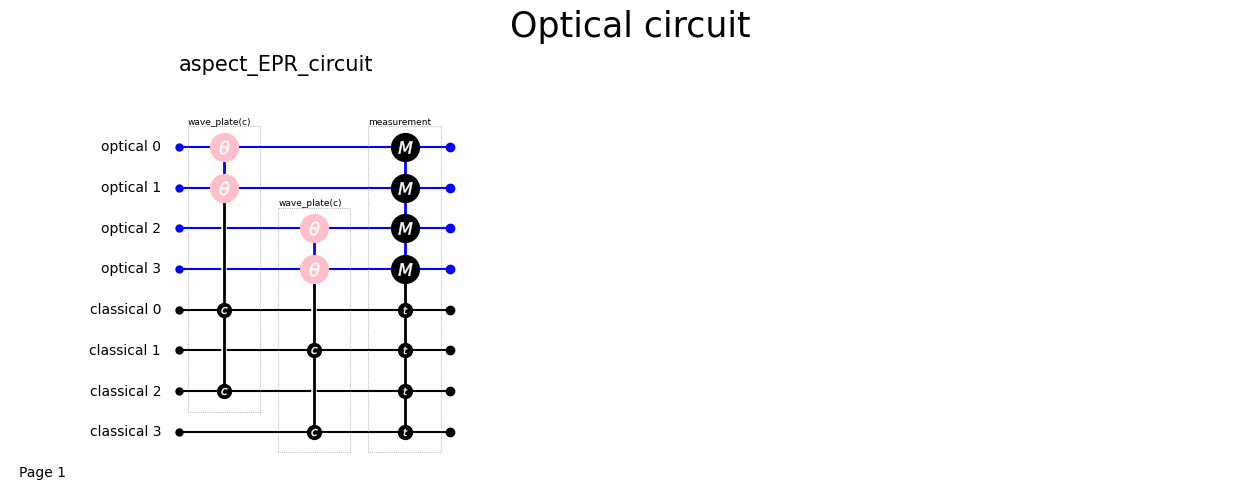

In [23]:
aspect_EPR_circuit = fsc.FockStateCircuit(length_of_fock_state = 3, 
                                no_of_optical_channels = 4,
                                no_of_classical_channels=4,
                                circuit_name='aspect_EPR_circuit'
                                )
aspect_EPR_detection = fsc.FockStateCircuit(length_of_fock_state = 3, 
                                no_of_optical_channels = 4,
                                no_of_classical_channels=4,
                                circuit_name='aspect_EPR_detection'
                                )

aspect_EPR_circuit.wave_plate_classical_control(optical_channel_horizontal=0,
                                     optical_channel_vertical=1,
                                     classical_channel_for_orientation=0,
                                     classical_channel_for_phase_shift=2)
aspect_EPR_circuit.wave_plate_classical_control(optical_channel_horizontal=2,
                                     optical_channel_vertical=3,
                                     classical_channel_for_orientation=1,
                                     classical_channel_for_phase_shift=3)

aspect_EPR_circuit.measure_optical_to_classical(optical_channels_to_be_measured=[0,1,2,3],
                                                    classical_channels_to_be_written=[0,1,2,3]
                                                    )
aspect_EPR_circuit.draw()

![Alt text](SuperentanglementSlide8.JPG)

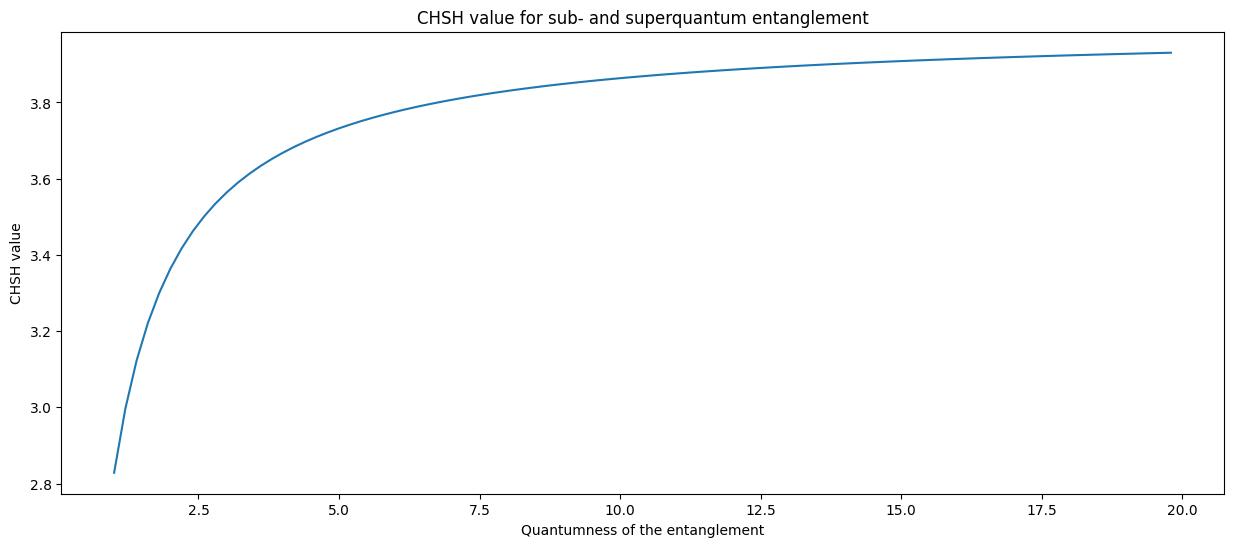

In [24]:
def correlation_to_CHSH(correlation):
    return correlation['AB'] - correlation['Ab'] + correlation['aB'] + correlation['ab']

CHSHs = []
quantumnesses = [n/5 for n in range(5,100)]
for quantumness in quantumnesses:   
    initial_collection_of_states = fsc.CollectionOfStates(fock_state_circuit=aspect_EPR_circuit, 
                                                        input_collection_as_a_dict=dict([]))
    measurements_circular = {
                'AB': [np.pi/4, np.pi/4, 0,np.pi/4], 
                'Ab': [np.pi/4, np.pi/4, 0,np.pi/4 + np.pi/2], 
                'aB': [np.pi/4, np.pi/4, np.pi/2,np.pi/4], 
                'ab': [np.pi/4, np.pi/4, np.pi/2,np.pi/4 + np.pi/2]
                }

    measurements = {
                'AB': [0, np.pi/16,np.pi,np.pi], 
                'Ab': [0, np.pi/16 +  np.pi/8 ,np.pi,np.pi], 
                'aB': [np.pi/8, np.pi/16,np.pi,np.pi], 
                'ab': [np.pi/8, np.pi/16+np.pi/8,np.pi,np.pi]
                }

    CHSH_components = dict([])
    for label, measurement in measurements_circular.items():
        state = fsc.State(collection_of_states=initial_collection_of_states)
        state.classical_channel_values = measurement
        ns_boxes = [{'channels_Ah_Av_Bh_Bv':[0,1,2,3],'quantumness_indicator':quantumness}]
        collection_with_boxes = fsc.create_collection_with_NS_boxes(state, ns_boxes)
        result = aspect_EPR_circuit.evaluate_circuit(
            collection_of_states_input=collection_with_boxes)
        histogram = fsc.measure_collection_with_NS_boxes(result)

        channel_combis_for_correlation = [(0,2)]
        correlations = fsc.correlations_from_measured_collection_with_NS_boxes(histogram, 
                                                    channel_combis_for_correlation, state)
        CHSH_components.update({label:correlations[0]})
    CHSHs.append(correlation_to_CHSH(CHSH_components))
fig, ax = plt.subplots()
ax.set(xlabel='Quantumness of the entanglement', ylabel='CHSH value',
       title='CHSH value for sub- and superquantum entanglement')
ax.plot(quantumnesses,CHSHs)
plt.show()

![Alt text](SuperentanglementSlide9.JPG)

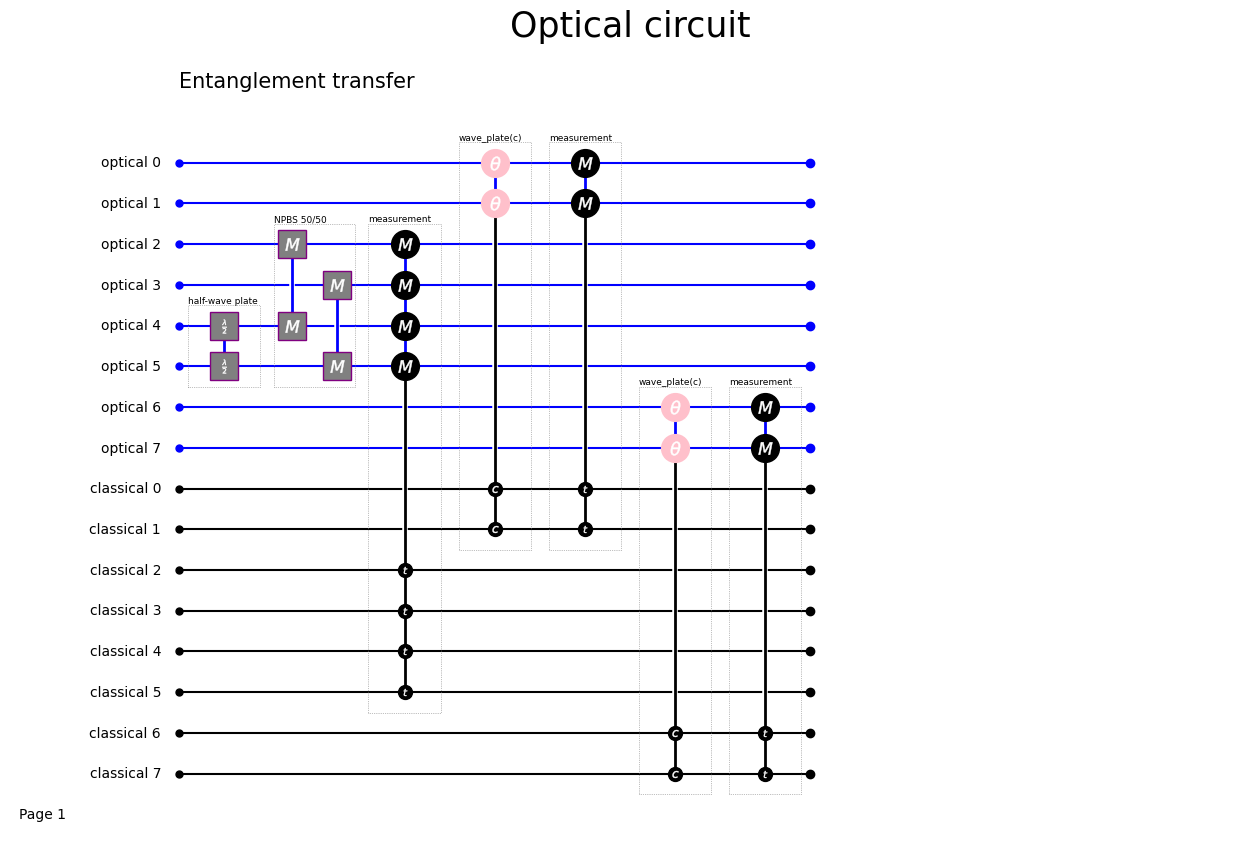

In [25]:
circuit = fsc.FockStateCircuit(length_of_fock_state = 3, 
                                no_of_optical_channels = 8,
                                no_of_classical_channels=8,
                                circuit_name='Entanglement transfer'
                                )
# Bell state measurement on the second and third photon
circuit.half_wave_plate_45(channel_horizontal=4,channel_vertical=5)
circuit.non_polarizing_50_50_beamsplitter(input_channels_a = (2,3), 
                                                input_channels_b = (4,5)
                                                )
circuit.measure_optical_to_classical(optical_channels_to_be_measured=[2,3,4,5],
                                     classical_channels_to_be_written=[2,3,4,5])

# Rotate first photon and measure outcome
circuit.wave_plate_classical_control(   optical_channel_horizontal = 0,
                                        optical_channel_vertical = 1,
                                        classical_channel_for_orientation = 0,
                                        classical_channel_for_phase_shift = 1
                                        )
circuit.measure_optical_to_classical(optical_channels_to_be_measured=[0,1],
                                     classical_channels_to_be_written=[0,1])

# Rotate fourth photon and measure outcome
circuit.wave_plate_classical_control(   optical_channel_horizontal = 6,
                                        optical_channel_vertical = 7,
                                        classical_channel_for_orientation = 6,
                                        classical_channel_for_phase_shift = 7
                                        )
circuit.measure_optical_to_classical(optical_channels_to_be_measured=[6,7],
                                     classical_channels_to_be_written=[6,7])
                                    
circuit.draw()

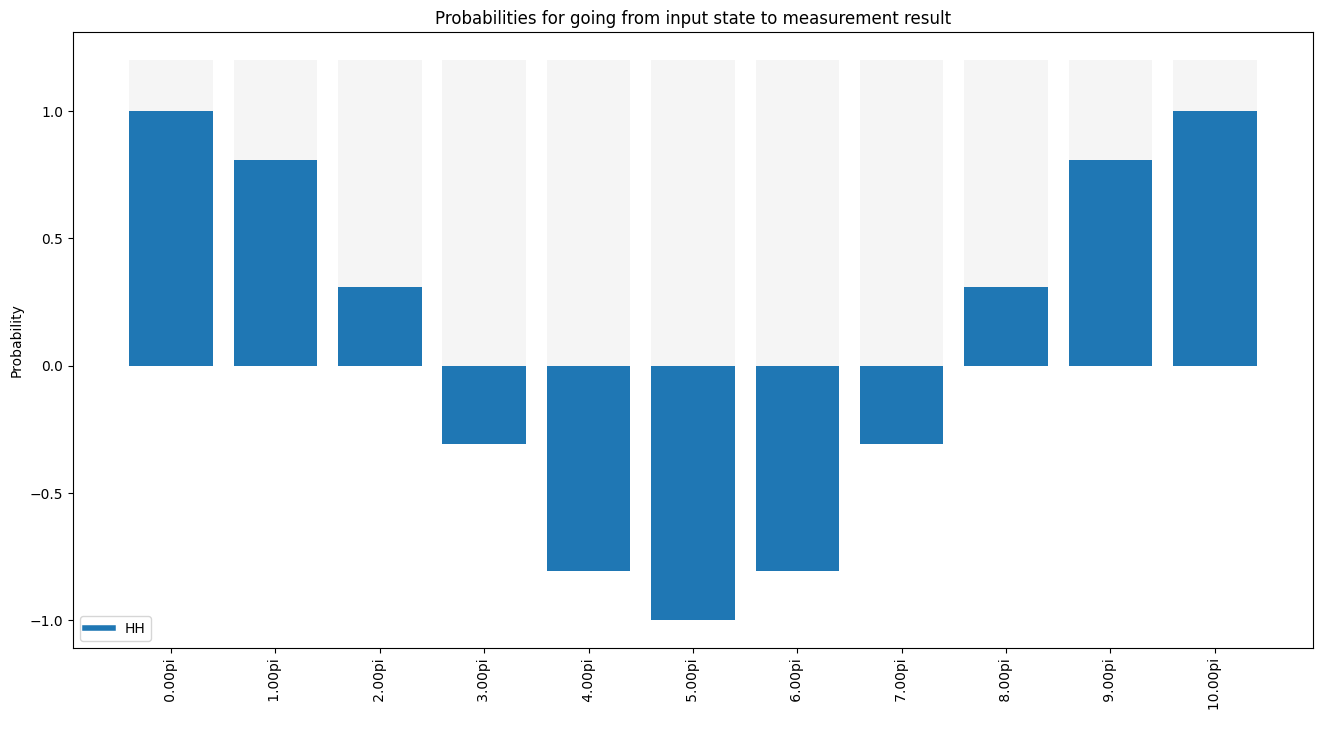

In [26]:
orientations = [((n*np.pi/10,0),"{:10.2f}".format(n)+"pi")  for n in range(11) ]
resulting_correlation = []

for orientation in orientations:
    orientation_angles, annotation = orientation
    orientation_first_photon_detector, orientation_fourth_photon_detector = orientation_angles
    
    orientation_ph_0 = (orientation_first_photon_detector/2,np.pi)
    orientation_ph_3 = (orientation_fourth_photon_detector/2,np.pi)
    selected_bell_state = 'phi_plus'
    initial_collection_of_states = fsc.CollectionOfStates(fock_state_circuit=circuit, 
                                                                    input_collection_as_a_dict=dict([]))

    state = fsc.State(collection_of_states=initial_collection_of_states)
    state.classical_channel_values = [orientation_ph_0[0]] + [orientation_ph_0[1]]  + 4*[0] + [orientation_ph_3[0]] + [orientation_ph_3[1]]

    r = 1/2
    state.initial_state = 'normal entanglement'
    state.optical_components = {'10101010': {'amplitude': r, 'probability': r**2}, 
                                '10100101': {'amplitude': r, 'probability': r**2}, 
                                '01011010': {'amplitude': r, 'probability': r**2}, 
                                '01010101': {'amplitude': r, 'probability': r**2}}
    initial_collection_of_states.add_state(state=state)
    
    result = circuit.evaluate_circuit(collection_of_states_input=initial_collection_of_states)

    full_histogram = result.plot(histo_output_instead_of_plot=True)
    histo = full_histogram['normal entanglement']

    measurement_result = {'same':0,'diff':0}
    teleportation_outcome = dict({'psi_plus_or_minus':measurement_result.copy(),
                                    'phi_plus':measurement_result.copy(),
                                    'phi_minus':measurement_result.copy(),
                                    'other':measurement_result.copy()
                                    })

    for outcome in histo:
        other_photon_result = outcome['output_state'][0:2]

        bell_measurement_result = outcome['output_state'][2:6]
        detection_result = outcome['output_state'][6:]
        prob = np.round(outcome['probability'],4)
        
        if bell_measurement_result in ('2000', '0200', '0020', '0002'):
            bell_state = 'psi_plus_or_minus'
        elif bell_measurement_result in ('1100', '0011'):
            bell_state = 'phi_plus'
        elif bell_measurement_result in ('0110', '1001'):
            bell_state = 'phi_minus'
        else:
            bell_state = 'other'
        if other_photon_result == detection_result:
            teleportation_outcome[bell_state]['same'] += prob
        else:
            teleportation_outcome[bell_state]['diff'] += prob

    count = teleportation_outcome[selected_bell_state]['same'] + teleportation_outcome[selected_bell_state]['diff']
    correlation = (teleportation_outcome[selected_bell_state]['same'] - teleportation_outcome[selected_bell_state]['diff'])/count
    resulting_correlation.append(correlation)

dict_for_plotting = dict([])
for index,label in enumerate([s[1] for s in orientations]):
    lst = []
    for number in range(1):
        new_outcome = 'HH'
        new_probability = resulting_correlation[index]
        lst.append({'output_state': new_outcome, 'probability': new_probability})
    dict_for_plotting.update({label: lst})
fsc.plot_correlations_for_NS_boxes(dict_for_plotting)


![Alt text](SuperentanglementSlide10.JPG)

![Alt text](SuperentanglementSlide11.JPG)

![Alt text](SuperentanglementSlide12.JPG)

![Alt text](SlideWithLinks.jpg)

# Change history
* November 2023: original version published on GitHub
* April 2024: Modified code. The module no_signalling_boxes was incorporated in FockStateCircuit. We removed `import as nosb` 
and replaced `nosb.method` by `fsc.method`. Some minor interface changes to the module were made as well.